In [48]:
#!pip install -U scikit-image

# Getting started

scikit-image is an image processing Python package that works with numpy arrays. The package is imported as skimage:

In [49]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

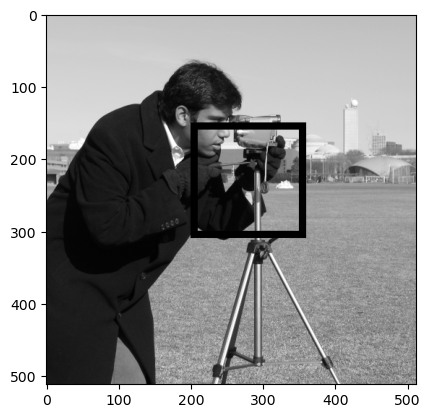

In [50]:
camera = ski.data.camera()

for i in range(150,300):
    for j in range(200, 210):
        camera[i, j] = 0
        camera[i, j+150] = 0

for i in range(150, 160):
    for j in range(200, 360):
        camera[i, j] = 0
        camera[i+150, j] = 0

plt.imshow(camera, cmap='gray')

# Trata de poner una figura geometrica sin relleno en la imagen

# Masking (indexing with masks of booleans):

# Color images

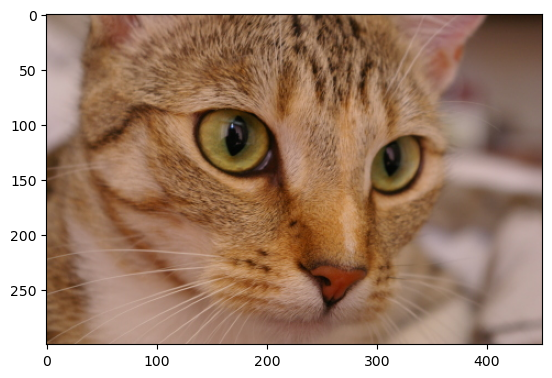

In [ ]:
cat = ski.data.chelsea()

plt.imshow(cat)

In [52]:
cat[10,10]

array([157, 135, 122], dtype=uint8)

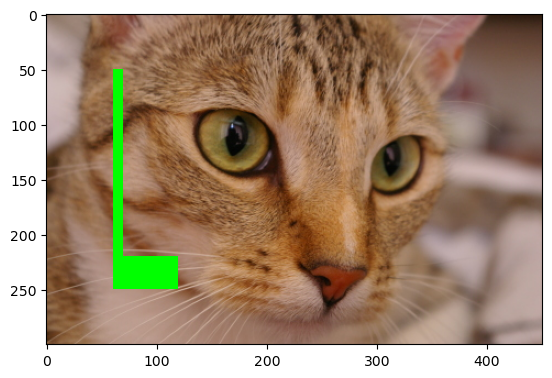

In [71]:
catL = ski.data.chelsea()
catL[50:250, 61:70] = [0, 255, 0]  # [red, green, blue]
catL[220:250, 61:120] = [0, 255, 0]  # [red, green, blue]

catL[300:350, 61:70] = [0, 255, 0]  # [red, green, blue]
catL[220:250, 61:120] = [0, 255, 0]  # [red, green, blue]



plt.imshow(catL)

# Projective transforms (homographies)

En procesamiento de imágenes, la transformación afín se utiliza para manipular imágenes de manera que se ajusten a ciertas necesidades, como corregir distorsiones, alinear imágenes, aplicar efectos de perspectiva, o mapear una imagen a una nueva forma. 

Tarea: 

Cambia la imagen del ejemplo anterior, y modifica los valores en 

- transform.rotate(cat, angle=45)
- transform.rescale(cat, scale=0.2,channel_axis= -1)
- ski.transform.AffineTransform()

# ProjectiveTransform

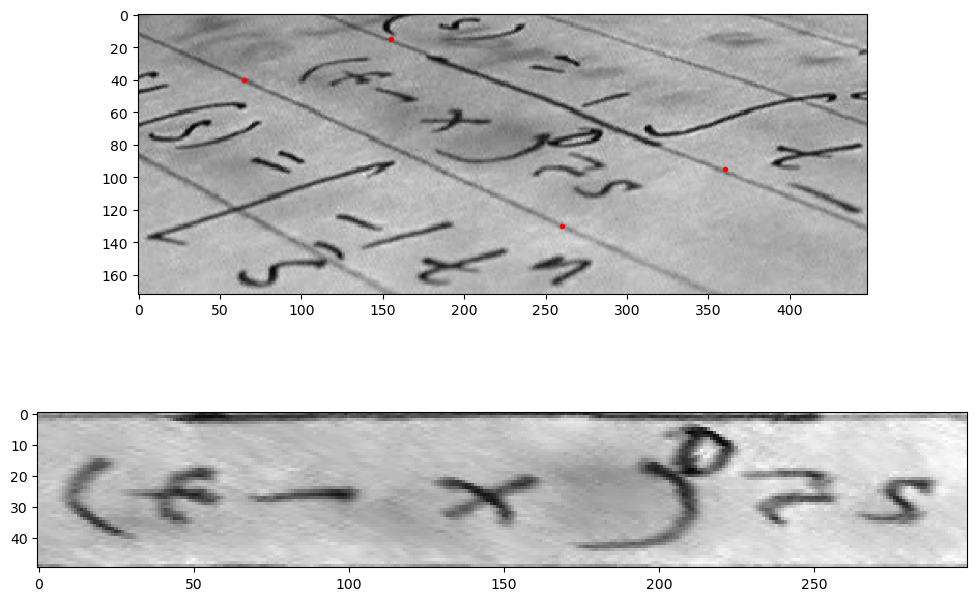

In [54]:
text = ski.data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = ski.transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = ski.transform.warp(text, tform3, output_shape=(50, 300))

fig = plt.figure(figsize=(12, 8))
fig.add_subplot(2, 1, 1)
plt.imshow(text, cmap='gray')
plt.plot(dst[:, 0], dst[:, 1], '.r')
fig.add_subplot(2, 1, 2)
plt.imshow(warped, cmap='gray')